<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

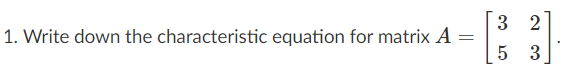
Problem 1.


(3-Λ)(3-Λ)-2*5 = 0

Problem 2. Find the eigenvalues and vectors for problem 1.

Λ = 3 ± (10)^{1/2}

Λ_+ , Λ_- ((10)^{1/2}/5 , 1),(-(10)^{1/2}/5 , 1)

Probem 3. Verify the eigenvalues and vectors

In [ ]:
import numpy as np

a = np.array([[3,2],[5,3]])
v = np.array([[np.sqrt(10)/5],[1]])
l = (np.sqrt(10)+3)

# If these match we have the correct values #
print(np.matmul(a,v))
print(l * v)

# Here are the eigenvalues and vector with built in numpy function #
print(np.linalg.eig(a)[0])
print(np.linalg.eig(a)[1])


[[3.8973666 ]
 [6.16227766]]
[[3.8973666 ]
 [6.16227766]]
[ 6.16227766 -0.16227766]
[[ 0.53452248 -0.53452248]
 [ 0.84515425  0.84515425]]


Problem 4.

In [ ]:
import numpy as np

def power_iteration(matrix,x, num_iterations=1000, tol=1e-10):

    """
    Perform power iteration to find the dominant eigenvalue and eigenvector of a square matrix.

    Parameters:
    - matrix: numpy array, the square matrix for which to find the dominant eigenvalue and eigenvector
    - x: an intial vector guess
    - num_iterations: int, maximum number of iterations
    - tol: float, convergence tolerance

    Returns:
    - eigenvalue: float, dominant eigenvalue of the matrix
    - eigenvector: numpy array, corresponding eigenvector
    """

    for _ in range(num_iterations):
        # Perform matrix-vector multiplication #
        y = np.dot(matrix, x)

        # Normalize the resulting vector #
        eigenvalue = np.linalg.norm(y)
        x = y / eigenvalue

        # Check for convergence #
        if np.linalg.norm(np.dot(matrix, x) - eigenvalue * x) < tol:
            break

    return eigenvalue, x


A = np.array([[2, 1, 2], [1, 3, 2], [2, 4, 1]])
x = np.array ([1,1,1])
    # Find dominant eigenvalue and eigenvector #
eigenvalue, eigenvector = power_iteration(A, x, 8)

print("Dominant eigenvalue:", eigenvalue)
print("Corresponding eigenvector:", eigenvector)

Dominant eigenvalue: 6.02910724982892
Corresponding eigenvector: [0.4718582  0.58896955 0.65609809]


Problem 5.

In [ ]:
def smallest_power_iteration(matrix, x, num_iterations=1000, tolerance=1e-10):
    """
    Perform power iteration to find the smallest eigenvalue and eigenvector of a square matrix.

    Parameters:
    - matrix: numpy array, the square matrix for which to find the smallest eigenvalue and eigenvector
    - x: an intial vector guess
    - num_iterations: int, maximum number of iterations
    - tolerance: float, convergence tolerance

    Returns:
    - eigenvalue: float, smallest eigenvalue of the matrix
    - eigenvector: numpy array, corresponding eigenvector
    """
    # Start with a random vector
    n = matrix.shape[0]
    x = np.random.rand(n)

    for _ in range(num_iterations):
        # Perform matrix-vector multiplication #
        y = np.linalg.solve(matrix, x)  # Solve Ax = y for x, where A is the matrix #

        # Normalize the resulting vector #
        eigenvalue = np.linalg.norm(y)
        x = y / eigenvalue

        # Check for convergence $
        if np.linalg.norm(np.dot(matrix, x) - eigenvalue * x) < tolerance:
            break

    # Inverse the eigenvalue since we're dealing with the inverse matrix #
    smallest_eigenvalue = 1 / eigenvalue
    return smallest_eigenvalue, x

# Testing #
A = np.array([[2, 1, 2], [1, 3, 2], [2, 4, 1]])
x = np.array ([1,1,1])

# Find smallest eigenvalue and eigenvector #
smallest_eigenvalue, eigenvector = smallest_power_iteration(A, x)

print("Smallest eigenvalue:", smallest_eigenvalue)
print("Corresponding eigenvector:", eigenvector)

Smallest eigenvalue: 1.0
Corresponding eigenvector: [2.77204648e-11 7.07106781e-01 7.07106781e-01]


Problem 6.

In [ ]:
import numpy as np

def qr_decomposition(A):
    """
    Perform QR decomposition of a matrix using the Gram-Schmidt process.

    Parameters:
    - A: numpy array, the matrix to be decomposed

    Returns:
    - Q: numpy array, orthogonal matrix
    - R: numpy array, upper triangular matrix
    """
    A = A.astype(np.float64)
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Example matrix #
A = np.array([[2, 1, 2], [1, 3, 2], [2, 4, 1]])

# Perform QR decomposition #
Q, R = qr_decomposition(A)

print("Q:")
print(Q)
print("R:")
print(R)
print("QR:")
print(Q*R)

Q:
[[ 0.66666667 -0.7028635   0.24806947]
 [ 0.33333333  0.57882876  0.74420841]
 [ 0.66666667  0.41344912 -0.62017367]]
R:
[[3.         4.33333333 2.66666667]
 [0.         2.68741925 0.16537965]
 [0.         0.         1.36438208]]
QR:
[[ 2.         -3.04574182  0.66151858]
 [ 0.          1.55555556  0.12307692]
 [ 0.          0.         -0.84615385]]
